<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# 1 Some nomenclature

* Figrue: the canvas
* Axis: individual mathematical axes we use for plotting.
* one figure can have multiple axes.

# 2 Comparing the two ‘dialects’

In [2]:
import numpy as np
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

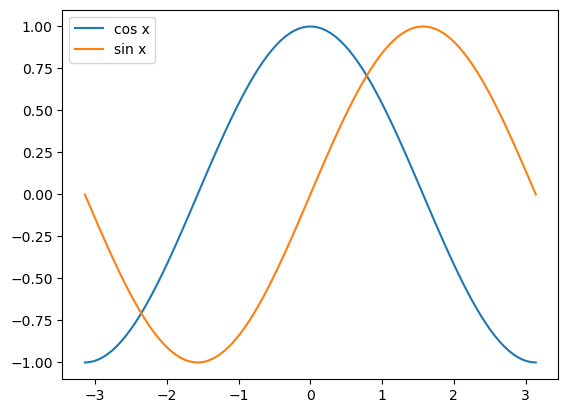

In [4]:
from matplotlib import pyplot as plt
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

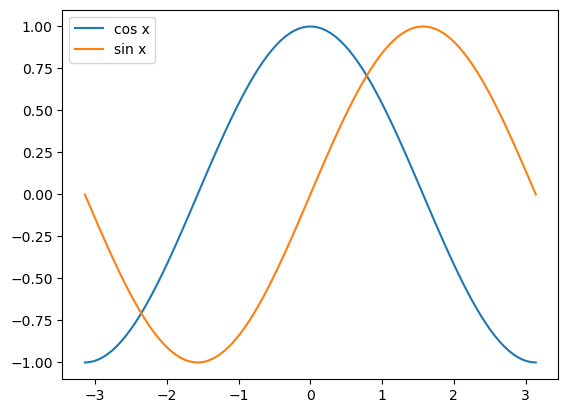

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

We use `subplots()` to create a figure and an axis. A figure (`fig`) and an axis (`ax`) are created.

# 3 What is OO ax, really?

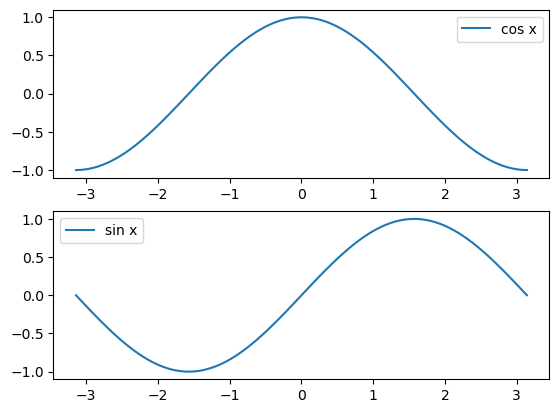

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1)  
# ask for two rows and one column. we do this by using subplots().

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

* `ax` is a NumPy array:

In [7]:
type(ax)

numpy.ndarray

* `ax` has a size 2:

In [8]:
ax.shape

(2,)

`ax` contains a Matplotlib axis:

In [9]:
type(ax[0])

matplotlib.axes._axes.Axes

# 4 A complete OO example

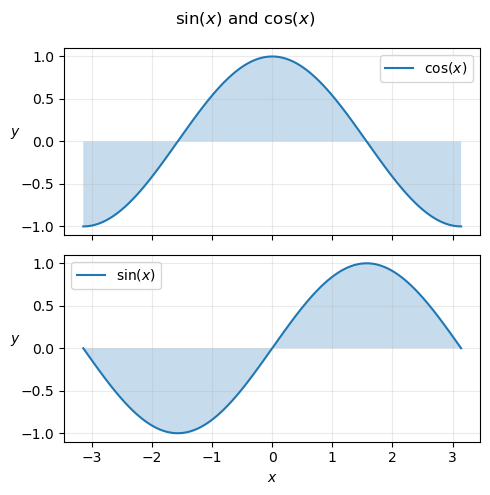

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

* Set up the axes and figure
    * Get two axes ready to plot in two rows in one column.
    * Change the size of the figure by specifying a figure size (`figsize`).
    * Ask that the plots share the  x-axis using `sharex`.
* Since `ax` is a NumPy array with two axes, we can index them using `0` and `1`. Then we just `plot` to that axis.
* Use `fill_between()` to fill the plots.
     * I have again just indexed the NumPy array to access the axes.
* Draw the legends
    * As in the previous example, we can do this one axis at a time. However, a more sensible way to do this is with a `for` loop that iterates through the items in `ax`
    * Let’s also add a grid to each plot and set the label.
* We are sharing the x-axis. So, we only need to label the lowest plot. This has the index 1.
* Let’s add a super title to the figure (notplot).
* Finally, let’s ask Matplotlib to make any necessary adjustments to the layout to make our plot look nice by calling tight_layout(). It would help if you convinced yourself of the utility of `tight_layout()` by producing the plot with and without it.

Text(0.5, 0.98, '$\\sin(x)$ and $\\cos(x)$')

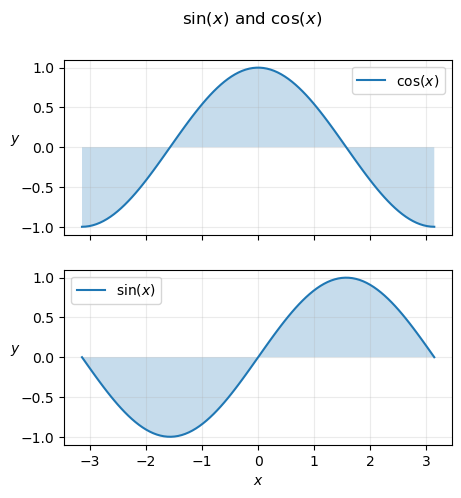

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

# 5 Multiple rows and columns

Form a grid of plots:

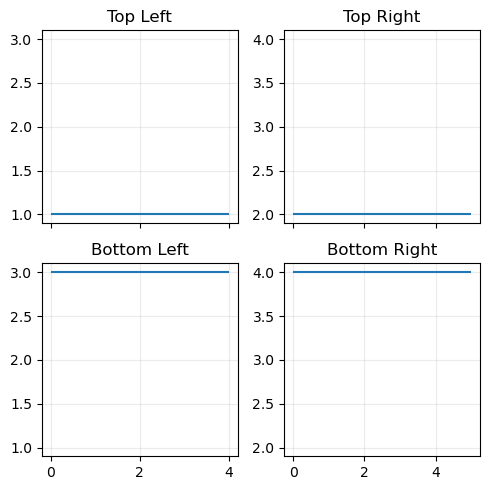

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

Create a figure and axes using:

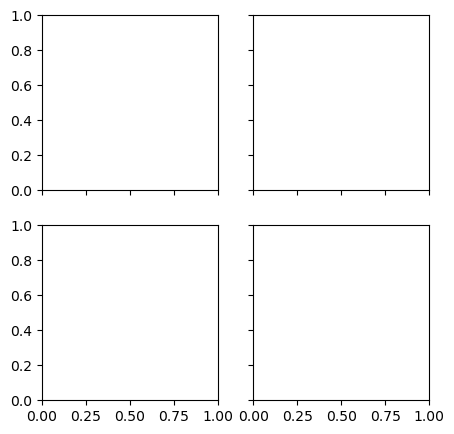

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

As we can see from below, `ax` is organised as a `2x2` array:

In [15]:
ax.shape

(2, 2)

Thus, I can access each of the axes as the following:

In [16]:
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

We can name each axis with a name we are familiar with to tweak each axis separately:

In [18]:
top_left, top_right, bottom_left, bottom_right = ax.flatten()
# flatten() takes the 2D array and falttens it to a 1D array

In [17]:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

To draw lines, we can use Matplotlib function `hlines()`:

In [19]:
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

We can use `sharex` and `sharey` to make the graph looks more compact. If we do not share the x or y axis, Matplotlib will auto-scale both axes:

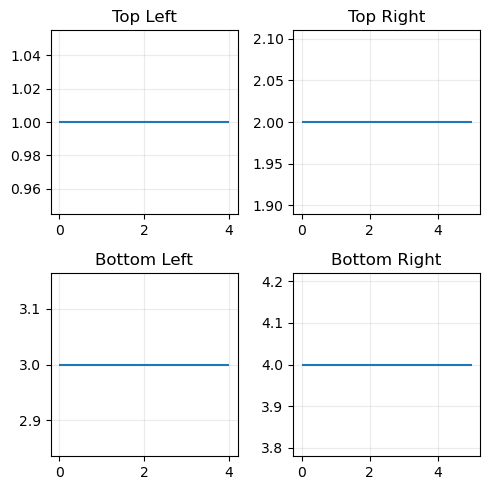

In [21]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

There are three ways to share the axes:
|**Option**|**Result**|
|:--|:--|
|`True`|Makes all the axes use the same range|
|`col`|Use the same range for all the columns|
|`row`|Use the same range for all the rows|

**Share rows**:

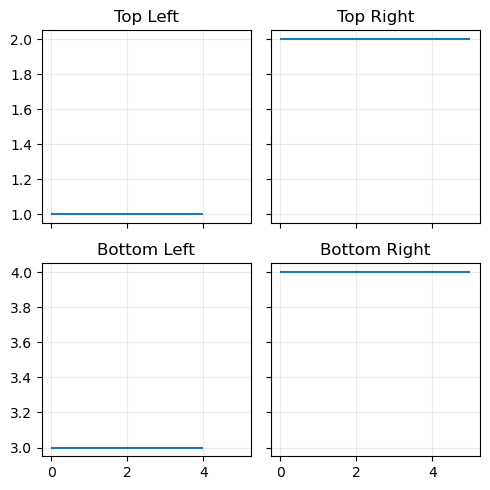

In [23]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

**Share columns**:

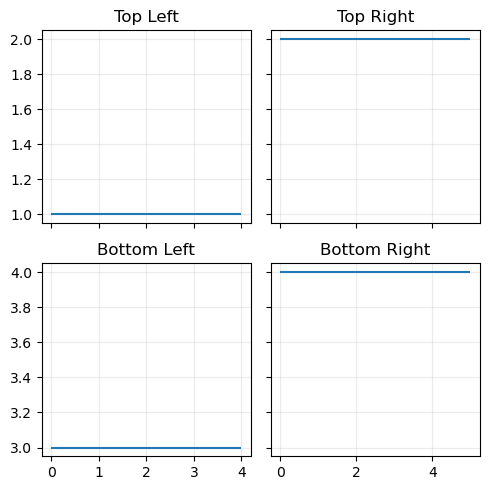

In [28]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

In this case sharing the columns is a better way to plot this grid of plots.

## 5.2 Accessing all axes

An inefficient way to apply changes to all axis:

In [25]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

A more efficient way:

In [26]:
for a in ax.flatten():
    a.grid(alpha=.25) # controls the line transparency with 1 to be the least transparent.

# 6 Other useful plots

## 6.1 Histograms

### Data

[all](https://phyweb.physics.nus.edu.sg/~chammika/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv)

[NUS only](https://phyweb.physics.nus.edu.sg/~chammika/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv)

### A quick helper function

In [29]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

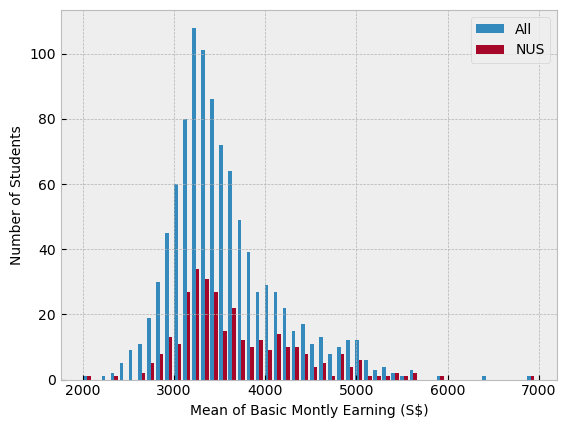

In [31]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

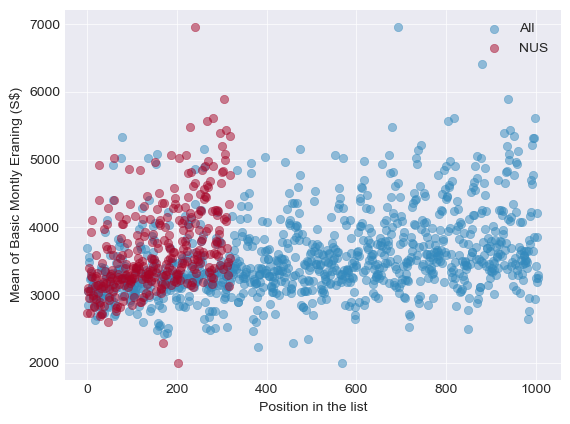

In [32]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

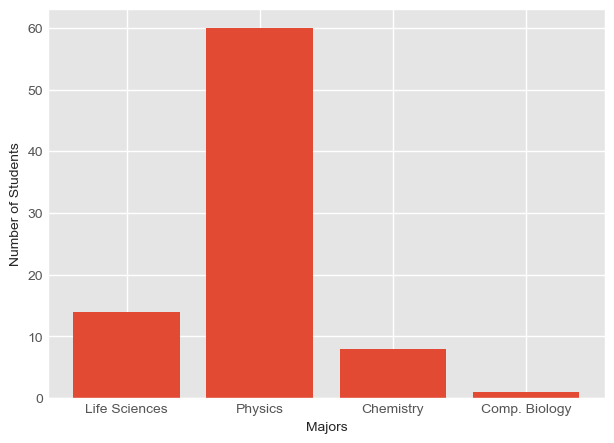

In [36]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 60,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')


## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

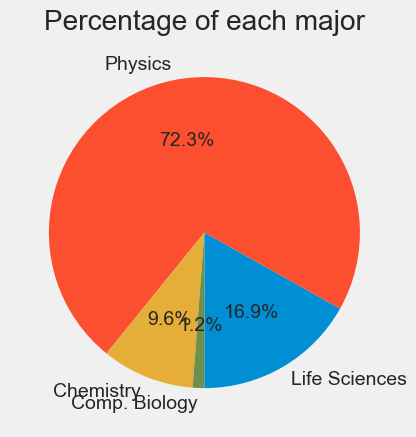

In [35]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 60,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')